In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Load the dataset
df = pd.read_csv("/content/Salary_dataset.csv")

In [ ]:
data = pd.DataFrame(df)

In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
def remove_outliers(df, column):
    from scipy import stats
    z_scores = np.abs(stats.zscore(df[column]))
    return df[(z_scores < 3)]

data = remove_outliers(data, 'Salary')

In [ ]:
data = data.astype({'YearsExperience': 'float', 'Salary': 'int'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 852.0 bytes


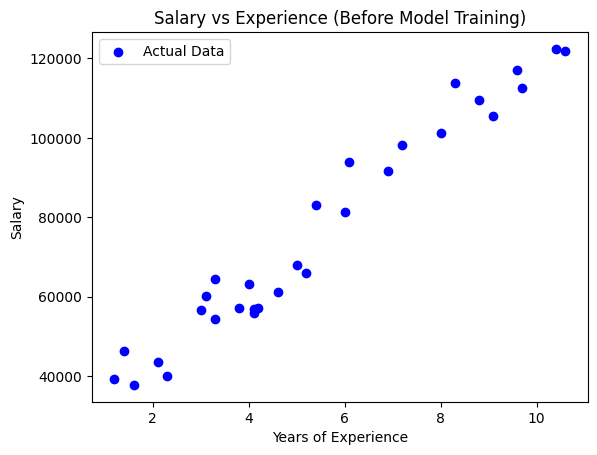

In [ ]:
# Visualizing the data before training
plt.scatter(data['YearsExperience'], data['Salary'], color='blue', label='Actual Data')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience (Before Model Training)")
plt.legend()
plt.show()

In [ ]:
#Splitting data into training and testing sets
X = data[['YearsExperience']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predictions on test set
y_pred = model.predict(X_test)

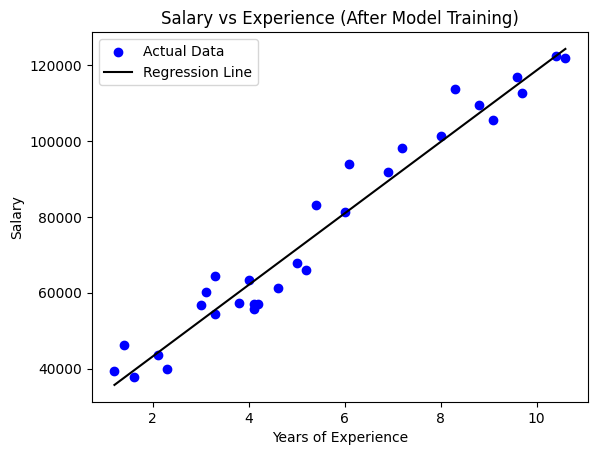

In [ ]:
#Visualizing the regression line after training
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='black', label='Regression Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience (After Model Training)")
plt.legend()
plt.show()

In [ ]:
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 49830096.855908394
Mean Absolute Error: 6286.453830757745
R² Score: 0.9024461774180497


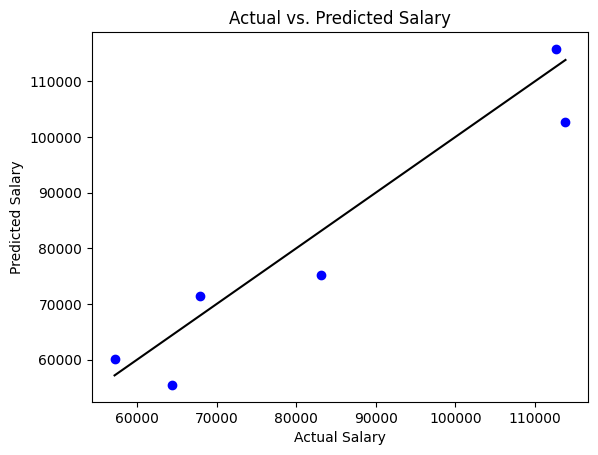

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black')
plt.show()

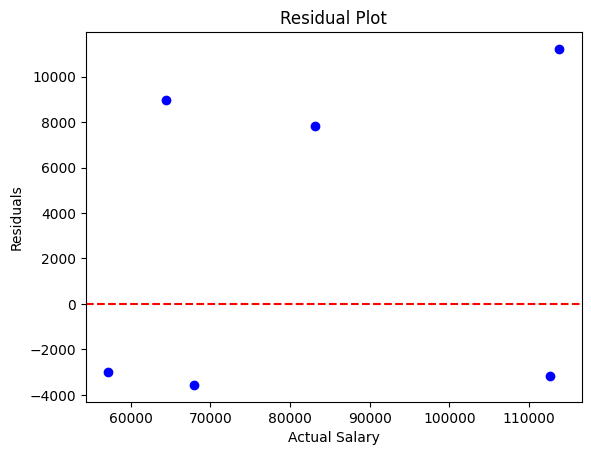

In [ ]:
#Residual Plot (Error Analysis)
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

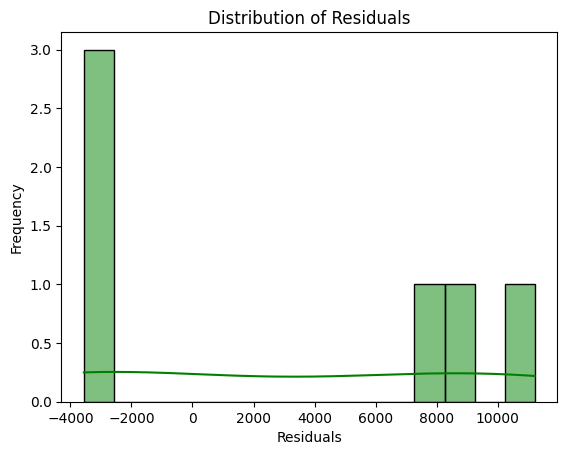

In [ ]:
#Histogram of Residuals
sns.histplot(residuals, kde=True, bins=15, color="green")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [ ]:
#Validation with sample data
sample_experience = np.array([3, 4.5, 5.2]).reshape(-1, 1)
sample_experience = pd.DataFrame({'YearsExperience': [3, 4.5, 5.2]})
predicted_salaries = model.predict(sample_experience)

In [ ]:
#Display results
for exp, sal in zip(sample_experience.values.flatten(), predicted_salaries):
    print(f"Years of Experience: {exp}, Predicted Salary: {sal:.2f}")

Years of Experience: 3.0, Predicted Salary: 52651.65
Years of Experience: 4.5, Predicted Salary: 66787.37
Years of Experience: 5.2, Predicted Salary: 73384.04
